## Assignment 2

Since COVID has had a larger impact on underserved racial and socioeconomic groups, the New York City government has asked you to look at the correlation across zipcodes between Census demographics (income and race) and  COVID impacts (case, death, and positivity rates). Unfortunately, the data you have been given for this assignment is, like many real world datasets, very messy, so you will need to clean it with care. 


*Note: in this assignment, we artifically introduced errors into the data to help introduce concepts - this is not the original data provided by the New York government or by the Census Bureau. Please don't tweet angry things at the city government and get us fired :)*

*To make this assignment less frustrating for you, we have included sanity checks throughout to make sure you are on the right track. Please pay attention to these sanity checks! If you are not passing them, it is a sign something has gone wrong. In the real world, of course, you would not have these sanity checks, which is why data cleaning is hard and frustrating.*

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Load covid data
nyc_covid_data = pd.read_csv('data/messy_covid_data2.csv')
nyc_covid_data.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label,lat,lon,COVID_CONFIRMED_CASE_COUNT,COVID_PROBABLE_CASE_COUNT,COVID_CASE_COUNT,COVID_CONFIRMED_CASE_RATE,COVID_CASE_RATE,POP_DENOMINATOR,COVID_CONFIRMED_DEATH_COUNT,COVID_PROBABLE_DEATH_COUNT,COVID_DEATH_COUNT,COVID_CONFIRMED_DEATH_RATE,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,7899,1794,9693,28606.00,35102.92,27613.09,58,6,64,210.05,231.77,13.20,56631
1,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,20210,3639,23849,26831.22,31662.43,75322.71,374,56,430,496.53,570.88,23.29,82347
2,10003,East Village /Gramercy/Greenwich Village,Manhattan,10003,40.731825,-73.989164,14455,2516,16971,26779.52,31440.70,53977.81,82,13,95,151.91,176.00,18.53,73177
3,10004,Financial District,Manhattan,10004,40.703675,-74.013106,961,228,1189,32333.87,40005.17,2972.12,2,0,2,67.29,67.29,11.38,8060
4,10005,Financial District,Manhattan,10005,40.706092,-74.008861,2118,725,2843,24185.74,32464.62,8757.23,0,1,1,0.00,11.42,16.04,12423


In [3]:
# Load nhgis data
nhgis_data = pd.read_csv('data/messy_nhgis0004_ds244_20195_2019_zcta.csv')
nhgis_data.head()

,YEAR,STUSAB,REGIONA,DIVISIONA,STATEA,COUNTYA,COUSUBA,PLACEA,TRACTA,BLKGRPA,...,ALUKM013,ALUKM014,ALUKM015,ALUKM016,ALUKM017,ALUKM018,ALUKM019,ALUKM020,ALUKM021,ALW1M001
0,2015-2019,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,868,104,24,6,22,796,169,75,151,1353.0
1,2015-2019,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,994,337,30,30,30,445,848,69,844,1241.0
2,2015-2019,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1107,307,56,55,30,891,212,121,176,999.0
3,2015-2019,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,540,100,28,20,20,563,68,76,31,2092.0
4,2015-2019,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,930,250,26,26,26,615,572,38,568,1756.0


In [4]:
# Load zcta2modzcta data
modzcta_data = pd.read_csv('data/messy_ZCTA-to-MODZCTA.csv')
modzcta_data.head()

,ZCTA,MODZCTA
0,10001,M10001
1,10002,M10002
2,10003,M10003
3,10004,M10004
4,10005,M10005


#### A first challenge is even figuring out which columns you want. Read the codebook for Census data (you can find this in the data folder with the other data files)  to figure out which column provides the median income for each zipcode. Drop the rows with missing values (NA or None) in this column and change its name into "median_income". (5 points)

*Sanity check: you will have 30,824 rows in census data after this step.*

In [5]:
nhgis_data.columns

Index(['YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATEA', 'COUNTYA',
       'COUSUBA', 'PLACEA', 'TRACTA', 'BLKGRPA', 'CONCITA', 'AIANHHA',
       'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITS', 'ANRCA', 'CBSAA', 'CSAA',
       'METDIVA', 'MEMI', 'NECTAA', 'CNECTAA', 'NECTADIVA', 'UAA', 'CDCURRA',
       'SLDUA', 'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA', 'SDSECA', 'SDUNIA',
       'UR', 'PCI', 'PUMA5A', 'BTTRA', 'BTBGA', 'ALUKE001', 'ALUKE002',
       'ALUKE003', 'ALUKE004', 'ALUKE005', 'ALUKE006', 'ALUKE007', 'ALUKE008',
       'ALUKE009', 'ALUKE010', 'ALUKE011', 'ALUKE012', 'ALUKE013', 'ALUKE014',
       'ALUKE015', 'ALUKE016', 'ALUKE017', 'ALUKE018', 'ALUKE019', 'ALUKE020',
       'ALUKE021', 'ALW1E001', 'ALUKM001', 'ALUKM002', 'ALUKM003', 'ALUKM004',
       'ALUKM005', 'ALUKM006', 'ALUKM007', 'ALUKM008', 'ALUKM009', 'ALUKM010',
       'ALUKM011', 'ALUKM012', 'ALUKM013', 'ALUKM014', 'ALUKM015', 'ALUKM016',
       'ALUKM017', 'ALUKM018', 'ALUKM019', 'ALUKM020', 'ALUKM021', 'ALW1M001'],
    

In [6]:
median_income_column = 'ALW1E001' #done it for ALW1M001, but it is not the right column. 'M' stands for margin of error. 'E' stands for estimate.

nhgis_data_cleaned = nhgis_data.dropna(subset=[median_income_column])

nhgis_data_cleaned = nhgis_data_cleaned.rename(columns={median_income_column: 'median_income'})

# Sanity Check
if nhgis_data_cleaned.shape[0] == 30824:
    print(f"Sanity check passed! Data has {nhgis_data_cleaned.shape[0]} rows.")
else:
    print(f"Sanity check failed! Data has {nhgis_data_cleaned.shape[0]} rows.")

Sanity check passed! Data has 30824 rows.


#### Use two of the columns in the Census data to compute the fraction of people who are white non-Hispanic in each zipcode. Add this column to the Census dataframe and call it "white_non_hispanic_frac". Please note that you should use "Estimates" rather than "Margins of error" (5 points)
*Sanity check: the mean value of "white_non_hispanic" is around 0.764*

In [7]:
white_non_hispanic_column = 'ALUKE003'
total_population_column = 'ALUKE001'

# Step 1: Create the white_non_hispanic_frac column
nhgis_data_cleaned['white_non_hispanic_frac'] = nhgis_data_cleaned[white_non_hispanic_column] / nhgis_data_cleaned[total_population_column]

# Step 2: Sanity check - the mean value of white_non_hispanic_frac should be around 0.764
mean_value = nhgis_data_cleaned['white_non_hispanic_frac'].mean()

if abs(mean_value - 0.764) < 0.01:
    print(f"Sanity check passed! The mean value of white_non_hispanic_frac is {mean_value:.3f}.")
else:
    print(f"Sanity check failed! The mean value of white_non_hispanic_frac is {mean_value:.3f}.")


Sanity check passed! The mean value of white_non_hispanic_frac is 0.764.


Now we have to find keys to merge the Census dataset with the COVID dataset. Look for a key in the Census dataset which corresponds to a location grouping you can use to merge with the COVID data. Unfortunately, the closest thing you can find is ZCTA, and the only thing in the New York City COVID data is MODZCTA. Read this documentation, which explains the difference - https://github.com/nychealth/coronavirus-data#geography-zip-codes-and-zctas. Basically, multiple ZCTAs can map to a single MODZCTA. 

To address this problem, you need to modify the Census data by filtering for ZCTAs which appear in the MODZCTA table and merging the Census data with the MODZCTA table using pd.merge. Prior to doing this merge, be sure that any keys you expect to be be unique in the Census data (ie, different in every row) are really unique, as we discussed in class - drop duplicate rows if necessary!

#### After doing the merge, you will be left with a dataframe which has multiple rows for some MODZCTAs; combine rows which correspond to the same MODZCTA into a single row. Every time you combine multiple rows, combine the values for white_non_hispanic and median_income by taking the mean. You can do this using the pandas groupby and agg commands. (20 points)

*Sanity check: If you did this step correctly, you should be left with a Census table which contains 177 rows.*

In [8]:
# Filter Census data to keep ZCTAs that are in the MODZCTA mapping
census_filtered = nhgis_data_cleaned[nhgis_data_cleaned['ZCTA5A'].isin(modzcta_data['ZCTA'])]

# Merge the Census data with the MODZCTA mapping table
merged_data = pd.merge(census_filtered, modzcta_data, how='inner', left_on='ZCTA5A', right_on='ZCTA')


# Group by MODZCTA and aggregate (mean) for the columns 'white_non_hispanic_frac' and 'median_income'
grouped_data = merged_data.groupby('MODZCTA').agg({
    'white_non_hispanic_frac': 'mean',
    'median_income': 'mean'
}).reset_index()

# Sanity check
if grouped_data.shape[0] == 177:
    print(f"Sanity check passed! Data has {grouped_data.shape[0]} rows.")
else:
    print(f"Sanity check failed! Data has {grouped_data.shape[0]} rows.")
    
grouped_data

Sanity check passed! Data has 177 rows.


,MODZCTA,white_non_hispanic_frac,median_income
0,M10001,0.545798,92840.0
1,M10002,0.220143,36982.0
2,M10003,0.691331,118161.0
3,M10004,0.592804,190223.0
4,M10005,0.716699,189702.0
...,...,...,...
172,M11691,0.229739,50267.0
173,M11692,0.114297,46819.0
174,M11693,0.445921,60569.0
175,M11694,0.735497,84485.0


#### Now we have a Census data table we can merge with the NYC COVID data. Merge the two datasets using MODZCTA as the merge key. Please pay attention to data format when you merge tables.  (5 points) ####

In [9]:
grouped_data['MODZCTA'] = grouped_data['MODZCTA'].astype(str)
nyc_covid_data['MODIFIED_ZCTA'] = nyc_covid_data['MODIFIED_ZCTA'].astype(str).apply(lambda x: 'M' + x if not x.startswith('M') else x)

# Merge the Census data (grouped_data) with the NYC COVID data
merged_final_data = pd.merge(grouped_data, nyc_covid_data, left_on='MODZCTA', right_on='MODIFIED_ZCTA', how='inner')

merged_final_data.head()

# Sanity check
print(f"Merged data contains {merged_final_data.shape[0]} rows.")

Merged data contains 177 rows.


In [10]:
# Merge Check
modzcta_set = set(grouped_data['MODZCTA'])
modified_zcta_set = set(nyc_covid_data['MODIFIED_ZCTA'])

if modzcta_set == modified_zcta_set:
    print("All MODZCTA values match between the datasets.")
else:
    print("Warning: There are discrepancies in MODZCTA values between the datasets.")
    print(f"Differences: {modzcta_set.symmetric_difference(modified_zcta_set)}")

# Verify all values start with 'M'
if all(x.startswith('M') for x in modzcta_set) and all(x.startswith('M') for x in modified_zcta_set):
    print("All MODZCTA values correctly start with 'M'.")
else:
    print("Warning: Some MODZCTA values do not start with 'M'.")

# Check if any data was lost in the merge
if len(merged_final_data) == len(grouped_data) == len(nyc_covid_data):
    print("The merge retained all rows from both datasets.")
else:
    print("Warning: Some rows were lost in the merge.")
    print(f"Grouped data: {len(grouped_data)} rows")
    print(f"NYC COVID data: {len(nyc_covid_data)} rows")
    print(f"Merged data: {len(merged_final_data)} rows")

# List all columns in the merged dataset
print("\nColumns in the merged dataset:")
print(merged_final_data.columns.tolist())

All MODZCTA values match between the datasets.
All MODZCTA values correctly start with 'M'.
The merge retained all rows from both datasets.

Columns in the merged dataset:
['MODZCTA', 'white_non_hispanic_frac', 'median_income', 'MODIFIED_ZCTA', 'NEIGHBORHOOD_NAME', 'BOROUGH_GROUP', 'label', 'lat', 'lon', 'COVID_CONFIRMED_CASE_COUNT', 'COVID_PROBABLE_CASE_COUNT', 'COVID_CASE_COUNT', 'COVID_CONFIRMED_CASE_RATE', 'COVID_CASE_RATE', 'POP_DENOMINATOR', 'COVID_CONFIRMED_DEATH_COUNT', 'COVID_PROBABLE_DEATH_COUNT', 'COVID_DEATH_COUNT', 'COVID_CONFIRMED_DEATH_RATE', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE', 'TOTAL_COVID_TESTS']


#### Now compute the correlations across MODZCTAs between the white non-Hispanic fraction, the median income, and the COVID case and death rates and percent positive. If you want to compute correlations between all five of these variables at once, you can use the pandas method "corr". What is the correlation between median_income and COVID_CASE_RATE? (5 points) #### 

In [11]:
# Relevant columns
correlation_columns = ['white_non_hispanic_frac', 'median_income', 'COVID_CASE_RATE', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE']

# Compute the correlation matrix
correlation_matrix = merged_final_data[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract the specific correlation between median_income and COVID_CASE_RATE
income_case_correlation = correlation_matrix.loc['median_income', 'COVID_CASE_RATE']

print(f"\nCorrelation between median_income and COVID_CASE_RATE: {income_case_correlation:.4f}")

# Interpret the correlation
if abs(income_case_correlation) < 0.3:
    strength = "weak"
elif abs(income_case_correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if income_case_correlation > 0 else "negative"

print(f"This indicates a {strength} {direction} correlation between median income and COVID case rate.")

Correlation Matrix:
                         white_non_hispanic_frac  median_income  \
white_non_hispanic_frac                 1.000000       0.676294   
median_income                           0.676294       1.000000   
COVID_CASE_RATE                         0.304915       0.198499   
COVID_DEATH_RATE                       -0.240407      -0.443711   
PERCENT_POSITIVE                        0.043909      -0.132415   

                         COVID_CASE_RATE  COVID_DEATH_RATE  PERCENT_POSITIVE  
white_non_hispanic_frac         0.304915         -0.240407          0.043909  
median_income                   0.198499         -0.443711         -0.132415  
COVID_CASE_RATE                 1.000000          0.421653          0.724831  
COVID_DEATH_RATE                0.421653          1.000000          0.645676  
PERCENT_POSITIVE                0.724831          0.645676          1.000000  

Correlation between median_income and COVID_CASE_RATE: 0.1985
This indicates a weak positive correlati

#### Are the correlations in the directions you expect? Write a couple sentences interpreting the direction of the correlations. (5 points) #### 

The correlations mostly align with expected patterns based on our general socioeconomic and health condition knowledges with minor questions: <br>

##### **1. Median Income and COVID Case Rate (0.1985)**: <br>
We can assume that the weak positive correlation suggests higher-income areas may experience slightly higher COVID case rates. This could be due to more frequent testing or differences in population density rather than a direct cause-and-effect relationship.

##### **2. White Non-Hispanic Fraction and Median Income (0.6763)**: <br>
A moderate to strong positive correlation is expected as higher median incomes are often associated with areas with higher proportions of white non-Hispanic residents.

##### **3. COVID Case Rate and Percent Positive (0.7248)**: <br>
The strong positive correlation is expected, as areas with higher COVID case rates usually have higher percentages of positive tests, indicating that both metrics are likely reflecting the same underlying outbreak severity.

##### **4. Median Income and COVID Death Rate (-0.4437)**: <br>
The moderate negative correlation suggests that higher-income areas tend to have lower death rates. We think that this is due to better healthcare access and resources available in higher-income regions, which could mitigate the severity of outcomes despite higher case rates (as we assumed above).

##### **5. Percent Positive and COVID Death Rate (0.6457)**: <br>
The moderate to strong positive correlation is expected, as higher percentages of positive tests generally correlate with more severe outbreaks and, therefore, higher death rates.

#### It turns out that several of these five columns have bad values that we still haven't filtered out. Use the pandas method "describe" to find values which are implausibly large or small. Print out the results here and explain your interpretation. (10 points) ####

In [12]:
# Use the describe method to get a statistical summary for the five columns
summary_stats = merged_final_data[correlation_columns].describe()

# Display the results
print("Summary statistics for the correlation columns:")
print(summary_stats)

# Interpretation of the summary
print("\nInterpretation of potential bad values:")
for column in correlation_columns:
    min_val = summary_stats.loc['min', column]
    max_val = summary_stats.loc['max', column]
    
    if min_val < 0:
        print(f"Warning: {column} has a minimum value of {min_val}, which might be implausibly small.")
    if max_val > 1 and column == 'white_non_hispanic_frac':  # Check fractions out of bounds
        print(f"Warning: {column} has a maximum value of {max_val}, which should be between 0 and 1.")
    elif max_val > 100 and column in ['COVID_CASE_RATE', 'PERCENT_POSITIVE']:
        print(f"Warning: {column} has a maximum value of {max_val}, which seems implausibly large.")
    elif max_val > 1000000 and column == 'median_income':
        print(f"Warning: {column} has a maximum value of {max_val}, which seems unusually high.")


Summary statistics for the correlation columns:
       white_non_hispanic_frac  median_income  COVID_CASE_RATE  \
count               177.000000     177.000000       177.000000   
mean                  0.363369   77805.544256     31297.389266   
std                   0.257827   38102.910089      8259.293999   
min                   0.010038   21447.000000         0.000000   
25%                   0.118419   54184.000000     29207.000000   
50%                   0.355179   70793.000000     31989.010000   
75%                   0.587448   93364.333333     34965.970000   
max                   0.910724  250001.000000     53255.700000   

       COVID_DEATH_RATE  PERCENT_POSITIVE  
count        177.000000        177.000000  
mean         431.182486         22.700339  
std          213.431713          6.742982  
min            0.000000          0.000000  
25%          319.360000         20.350000  
50%          443.370000         24.040000  
75%          547.590000         25.990000  
max  

##### 1. white_non_hispanic_frac:

Values range from 0.010 to 0.911, which seem reasonable as this is a fraction between 0 and 1.

##### 2. median_income:

The range is between 21,447 and 250,001. While incomes as high as $250k are possible, we think it is a notable outlier compared to the mean of around $77,800. This could represent a high-income area, but it's worth verifying if these values are realistic based on your geographic context.

##### 3. COVID_CASE_RATE:

The maximum value is 53,255.7, which seems very high compared to the mean of 31,297. While high case rates might exist in certain areas, this could potentially indicate reporting or data entry errors.

##### 4. COVID_DEATH_RATE:

The maximum value is 1,234, with a mean of 431. Although this is a high death rate, it might be plausible in severely affected areas.

##### 5. PERCENT_POSITIVE:

The range (0 to 35.27%) seems realistic for percentage-positive rates. There are no extreme outliers here, but values of 0% could indicate areas with no testing or a possible data issue.

#### Recompute these correlations after removing the rows with these bad values (a tip: look at the abnormal values in covid data). How many rows did you remove? What is the correlation between median_income and COVID_CASE_RATE now? (10 points) ####

In [13]:
# Exclude value with 0

filtered_data = merged_final_data[
    (merged_final_data['COVID_CASE_RATE'] > 0) &
    (merged_final_data['COVID_DEATH_RATE'] > 0) &
    (merged_final_data['PERCENT_POSITIVE'] > 0)
]

# Cleaning extremely high values

COVID_CASE_RATE_threshold = 50000  # Threshold for COVID_CASE_RATE
COVID_DEATH_RATE_threshold = 1000  # Threshold for COVID_DEATH_RATE

filtered_data = filtered_data[
    (filtered_data['COVID_CASE_RATE'] <= COVID_CASE_RATE_threshold) &
    (filtered_data['COVID_DEATH_RATE'] <= COVID_DEATH_RATE_threshold)
]

rows_removed = len(merged_final_data) - len(filtered_data)
print(f"Number of rows removed: {rows_removed}")

Number of rows removed: 13


In [14]:
# Compute the correlation matrix again

correlation_columns = ['white_non_hispanic_frac', 'median_income', 'COVID_CASE_RATE', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE']
correlation_matrix = filtered_data[correlation_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

income_case_correlation = correlation_matrix.loc['median_income', 'COVID_CASE_RATE']

print(f"\nCorrelation between median_income and COVID_CASE_RATE: {income_case_correlation:.4f}")

Correlation Matrix:
                         white_non_hispanic_frac  median_income  \
white_non_hispanic_frac                 1.000000       0.666775   
median_income                           0.666775       1.000000   
COVID_CASE_RATE                         0.085041      -0.109008   
COVID_DEATH_RATE                       -0.520401      -0.693645   
PERCENT_POSITIVE                       -0.269301      -0.547054   

                         COVID_CASE_RATE  COVID_DEATH_RATE  PERCENT_POSITIVE  
white_non_hispanic_frac         0.085041         -0.520401         -0.269301  
median_income                  -0.109008         -0.693645         -0.547054  
COVID_CASE_RATE                 1.000000          0.082402          0.403354  
COVID_DEATH_RATE                0.082402          1.000000          0.545012  
PERCENT_POSITIVE                0.403354          0.545012          1.000000  

Correlation between median_income and COVID_CASE_RATE: -0.1090


*If you're doing it correctly, you may have a negative correlation between median_income and COVID_CASE_RATE now rather than a positive value you got before. This is why it's important to be careful cleaning your data - if you get unlucky, a couple bad datapoints can totally change your conclusions.*

Another important lesson here is to use statistical measures which are robust (ie, won't totally break) if you have a few bad datapoints. Conventional correlation (Pearson correlation) can be heavily influenced by outliers, which is why it breaks here. Spearman correlation is less influenced by outliers, for reasons we'll discuss. Compute Spearman correlation using the messy data, without filtering out the bad rows; you will see that it is less sensitive to outliers.

#### Another way to make your analyses robust is to run them several different ways: for example, compute both Spearman AND pearson correlation with updated data. What do you find? (10 points) ####

In [15]:
# Compute Pearson & Spearman correlations
pearson_corr, _ = stats.pearsonr(filtered_data['median_income'], filtered_data['COVID_CASE_RATE'])
spearman_corr, _ = stats.spearmanr(filtered_data['median_income'], filtered_data['COVID_CASE_RATE'])

print(f"Pearson correlation after cleaning: {pearson_corr:.4f}")
print(f"Spearman correlation after cleaning: {spearman_corr:.4f}")


if abs(pearson_corr) < 0.3:
    strength = "weak"
elif abs(pearson_corr) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if pearson_corr > 0 else "negative"

print(f"This indicates a {strength} {direction} correlation between median income and COVID case rate.")

Pearson correlation after cleaning: -0.1090
Spearman correlation after cleaning: -0.0816
This indicates a weak negative correlation between median income and COVID case rate.


The analysis shows a weak negative correlation between median income and COVID case rate, with Pearson correlation at -0.1090 and Spearman correlation at -0.0816. This suggests that as median income increases, the COVID case rate slightly decreases, but the relationship is not strong. <br>

By lowering the 'COVID_CASE_RATE_threshold' value from 50,000 to 40,000 and further, the negative correlation became stronger, indicating that as we focus more on the median income group, the poorer the individuals, the higher the COVID rate.

#### It's also a good idea to plot the data. Use seaborn's pairplot function to plot all 5 variables, making it obvious that something weird is happening with the original values. (5 points) ####

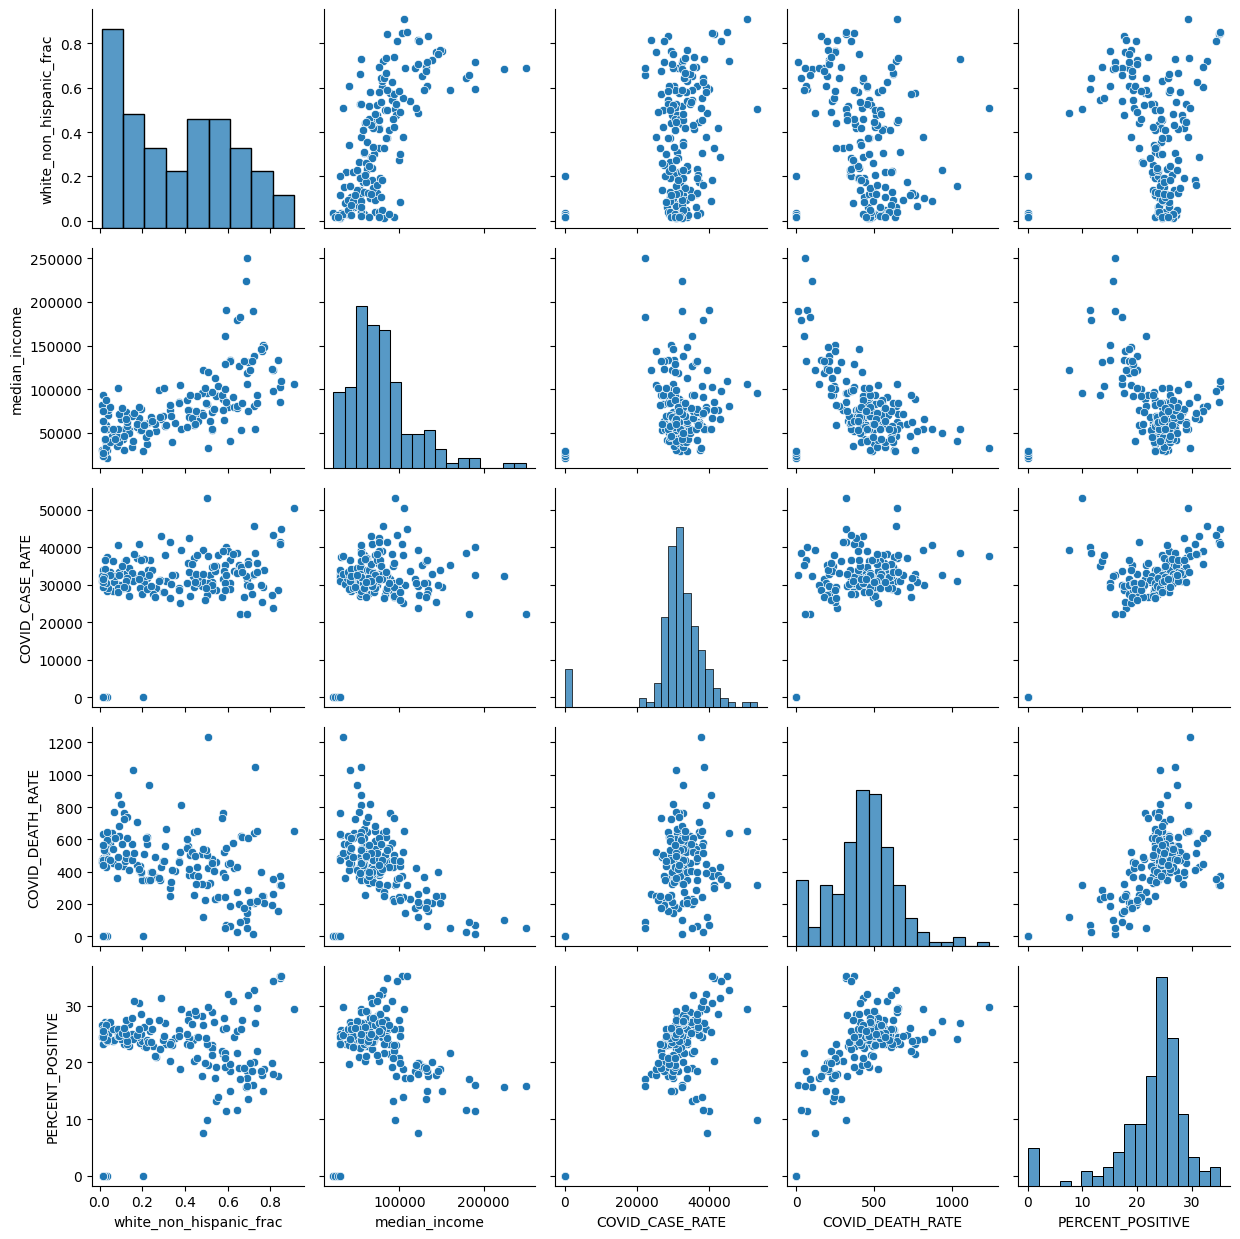

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_columns = ['white_non_hispanic_frac', 'median_income', 'COVID_CASE_RATE', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE']

sns.pairplot(merged_final_data[plot_columns])

plt.tight_layout()
plt.show()

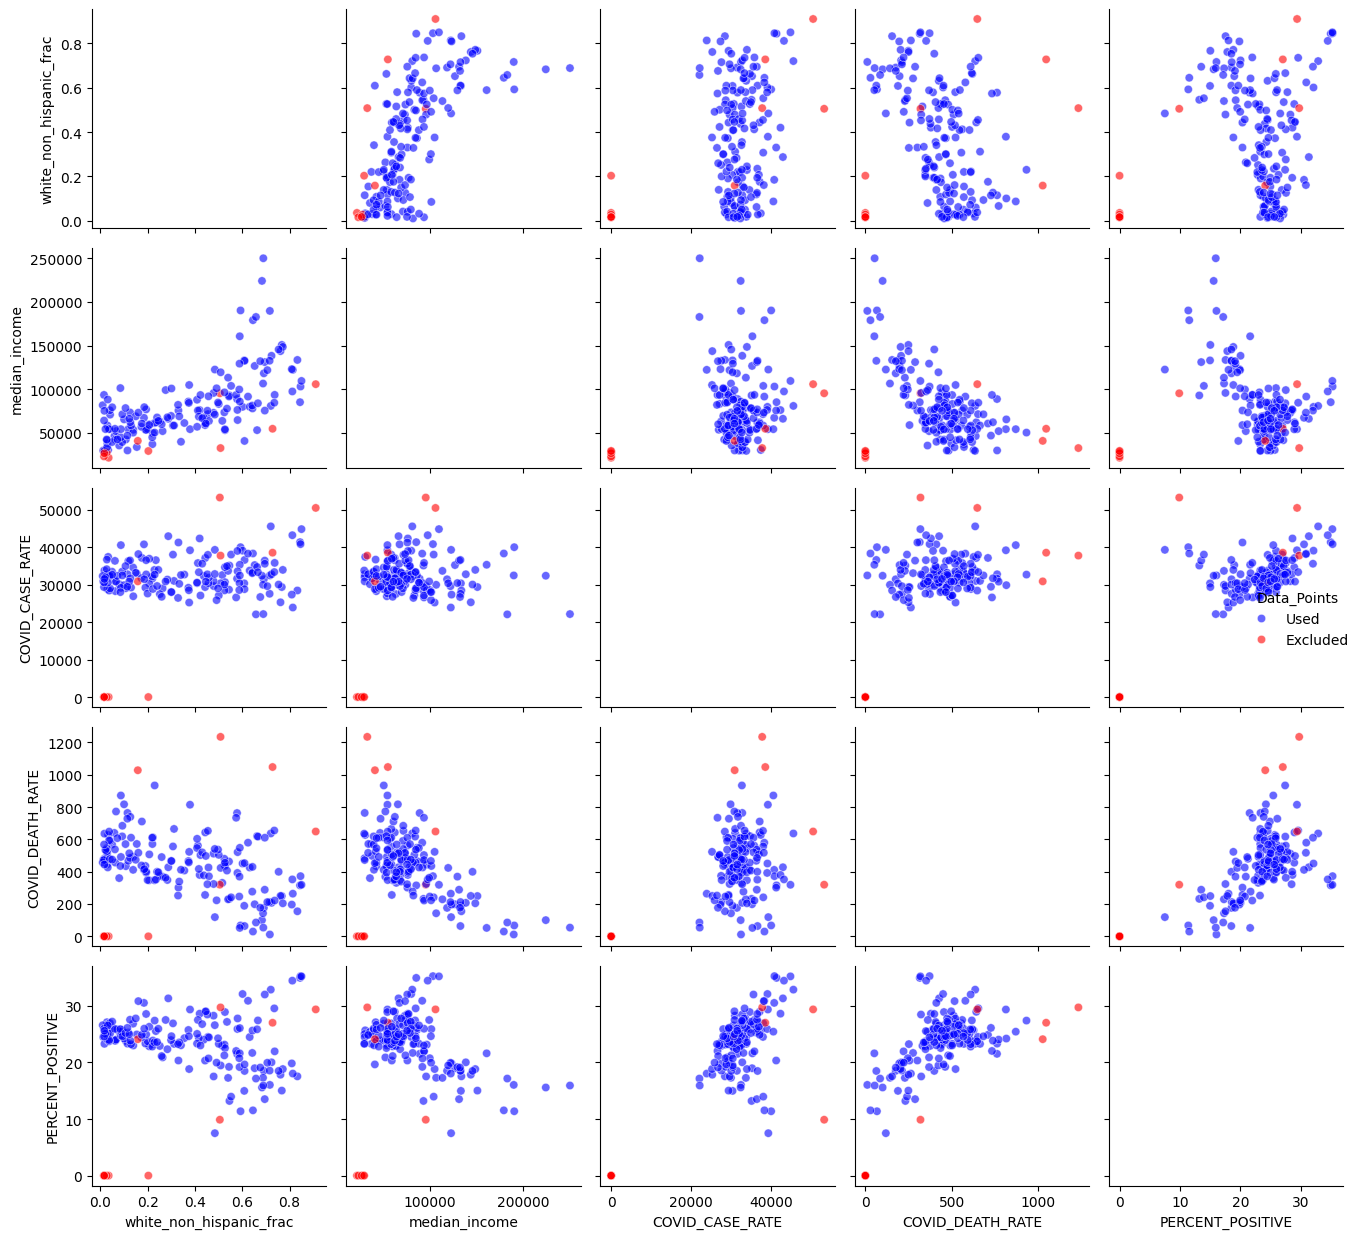

In [17]:
# Marking the excluded data points
merged_final_data['Data_Points'] = 'Used'
merged_final_data.loc[
    (merged_final_data['COVID_CASE_RATE'] > COVID_CASE_RATE_threshold) | 
    (merged_final_data['COVID_DEATH_RATE'] > COVID_DEATH_RATE_threshold) |
    (merged_final_data['COVID_CASE_RATE'] == 0) |
    (merged_final_data['COVID_DEATH_RATE'] == 0) |
    (merged_final_data['PERCENT_POSITIVE'] == 0),
    'Data_Points'
] = 'Excluded'

pairplot = sns.pairplot(merged_final_data, vars=plot_columns, hue='Data_Points', palette={'Used': 'blue', 'Excluded': 'red'}, plot_kws={'alpha': 0.6}, diag_kind='')

plt.tight_layout()
plt.show()

#### Using the same merged dataframe you just used, re-calculate the Spearman correlation with same five variables (white non-Hispanic fraction, median income, COVID_CASE_RATE, COVID_DEATH_RATE, and PERCENT_POSITIVE). But this time, use the NEIGHBORHOOD_NAME as a location grouping rather than MODZCTA, as described below (20 points):

1. Split up neighborhoods using the "/" character. For example, "Chinatown" is one neighborhood. And MODZCTAs with the “Chinatown/Lower East Side” label should go into both the Chinatown row and the Lower East Side row.
2. Use the mean of all rate/percentage values of a certain neighborhood as its variable. For example, if "Roosevelt Island" has two MODZCTAs "Roosevelt Island/Lenox Hill" and "Roosevelt Island/Midtown East" and these two areas have PERCENT_POSITIVE as 12.00 and 8.00 respectively, then we assume Roosevelt Island has PERCENT_POSITIVE as (12+8)/2=10.00. Similarly, if the median income in "Roosevelt Island/Lenox Hill" is 1000, and the median income in "Roosevelt Island/Midtown East" is 2200, then we assume that Roosevelt Island has a median income of (2200 + 1000) / 2 = 1600. 
3. Remove all rows with abnormal COVID data prior to performing this analysis. 

What do you find?

*Sanity check 1: You should find 225 unique neighborhoods before removing rows with abnormal values*

*Sanity check 2: The mean of median_income in "Financial District" is roughly $164000 (and you may drop some rows due to the lack of data).*

In [18]:
# Step 1
neighborhoods_expanded = merged_final_data['NEIGHBORHOOD_NAME'].str.split('/', expand=True).stack().reset_index(level=1, drop=True)
merged_final_data_expanded = merged_final_data.drop('NEIGHBORHOOD_NAME', axis=1).join(neighborhoods_expanded.rename('NEIGHBORHOOD_NAME'))

# Normalize(lower) neighborhood names
merged_final_data_expanded['NEIGHBORHOOD_NAME'] = merged_final_data_expanded['NEIGHBORHOOD_NAME'].str.strip().str.lower()

# Step 2
numeric_columns = ['white_non_hispanic_frac', 'median_income', 'COVID_CASE_RATE', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE']
grouped_data = merged_final_data_expanded.groupby('NEIGHBORHOOD_NAME')[numeric_columns].mean().reset_index()

# Sanity Check 1
if len(grouped_data) == 225:
    print(f"Sanity check 1 passed! {len(grouped_data)} unique neighborhoods.")
else:
    print(f"Sanity check 1 failed! T{len(grouped_data)} unique neighborhoods.")

# Step 3
COVID_CASE_RATE_threshold = 50000
COVID_DEATH_RATE_threshold = 1000

unique_neighborhoods_filtered = grouped_data[
    (grouped_data['COVID_CASE_RATE'] > 0) &
    (grouped_data['COVID_DEATH_RATE'] > 0) &
    (grouped_data['PERCENT_POSITIVE'] > 0) &
    (grouped_data['COVID_CASE_RATE'] <= COVID_CASE_RATE_threshold) &
    (grouped_data['COVID_DEATH_RATE'] <= COVID_DEATH_RATE_threshold)
]

# Check the mean of median_income in "Financial District"
financial_district_income = grouped_data[grouped_data['NEIGHBORHOOD_NAME'] == 'financial district']['median_income'].mean()

# Sanity Check 2
if financial_district_income:
    if abs(financial_district_income - 164000) < 5000:  # Allowing a small margin
        print(f"Sanity check 2 passed! Median imcome in Financial District is ${financial_district_income}")
    else:
        print("Sanity check 2 failed! Median imcome in Financial District is ${financial_district_income}")
else:
    print("Sanity check 2 failed! Financial District data not found.")

Sanity check 1 passed! 225 unique neighborhoods.
Sanity check 2 passed! Median imcome in Financial District is $163667.75


In [19]:
# Calculate Spearman correlation
correlation_columns = ['white_non_hispanic_frac', 'median_income', 'COVID_CASE_RATE', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE']
spearman_corr_matrix = unique_neighborhoods_filtered[correlation_columns].corr(method='spearman')

print(spearman_corr_matrix)

                         white_non_hispanic_frac  median_income  \
white_non_hispanic_frac                 1.000000       0.742705   
median_income                           0.742705       1.000000   
COVID_CASE_RATE                         0.235359       0.065318   
COVID_DEATH_RATE                       -0.346171      -0.439505   
PERCENT_POSITIVE                       -0.013864      -0.145413   

                         COVID_CASE_RATE  COVID_DEATH_RATE  PERCENT_POSITIVE  
white_non_hispanic_frac         0.235359         -0.346171         -0.013864  
median_income                   0.065318         -0.439505         -0.145413  
COVID_CASE_RATE                 1.000000          0.185170          0.629013  
COVID_DEATH_RATE                0.185170          1.000000          0.511936  
PERCENT_POSITIVE                0.629013          0.511936          1.000000  


##### 1. Correlation with Median Income: <br>
The correlation between median income and COVID_CASE_RATE is weak but positive, unlike to previous analyses with the cleaned data. This indicates a slight increase in COVID case rate with higher median income.
Other variables, like COVID_DEATH_RATE and PERCENT_POSITIVE, also show varying degrees of correlation (negative) with median income.

##### 2. Comparison with Previous Matrix (MODZCTA): <br>
The correlation changes from negative to positive when switching from MODZCTA (cleaned) to neighborhood grouping. This highlights how different grouping methods can influence the observed relationships between variables. Considering the diffence between the results, we assume that neighborhood grouping provides a more localized view, potentially capturing different dynamics. <br>
In summary, we think the overall patterns of correlation are consistent, but using neighborhoods may provide a more granular view.